In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv(r'C:\Users\escag\ESProjects\OnlineRetail\OnlineRetail.csv', encoding='latin1')

In [2]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Data Exploration and Cleaning

In [4]:
df[df.Quantity <0].sort_values(by='Quantity') # Negative values are returns

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,6/14/2011 10:37,0.00,NaN,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,6/26/2011 16:08,9.95,17114.0,United Kingdom
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,-1,6/26/2011 16:08,6.25,17114.0,United Kingdom
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,-1,6/26/2011 16:08,8.95,17114.0,United Kingdom
242447,C558347,S,SAMPLES,-1,6/28/2011 14:47,9.90,NaN,United Kingdom


In [5]:
len(df.CustomerID.unique())

4373

In [6]:
# Check missing data
df.isnull().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.shape

(541909, 8)

In [8]:
#df['CustomerID'].fillna('Missing', inplace=True)
#df['Description'].fillna('Missing', inplace=True)
#df.isnull().sum() 

### Extract time and date

In [9]:
import datetime as dt

In [10]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])
df['Invoice_Date'] = df['InvoiceDate'].dt.date
df['Invoice_Time'] = df['InvoiceDate'].dt.time

In [11]:
df.drop('InvoiceDate', axis=1, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [12]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ..., 'lost',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [13]:
df['Sales']=df['Quantity']*df['UnitPrice']

In [14]:
df.groupby('CustomerID')['Sales'].agg(['mean', 'median','sum', 'max', 'count' ]).sort_values(by='sum')

,mean,median,sum,max,count
CustomerID,,,,,
17448.0,-4287.630000,-4287.63,-4287.63,-4287.63,1
15369.0,-1592.490000,-1592.49,-1592.49,-1592.49,1
14213.0,-238.440000,-237.60,-1192.20,-122.40,5
17603.0,-77.686667,12.48,-1165.30,250.00,15
12503.0,-1126.000000,-1126.00,-1126.00,-1126.00,1
...,...,...,...,...,...
12415.0,159.030141,114.84,123725.45,1718.40,778
14911.0,22.458516,16.80,132572.62,1687.17,5903
17450.0,534.137236,240.00,187482.17,7144.72,351


In [15]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time', 'Sales'],
      dtype='object')

### Create Daily, Monthly and Quarterly Total Revenues

In [16]:
print(df['Invoice_Date'].min(), " " , df['Invoice_Date'].max()) ## Only 9 days are included in the last month of the data set

2010-12-01   2011-12-09


In [17]:
# DAILY SALES
df['Invoice_Date']=df['Invoice_Date'].astype('datetime64[ns]')
DaySales=df.groupby('Invoice_Date')[['Sales']].sum() ## Total of daily sales
DaySales.rename({'Sales': 'SumDaySale'}, axis=1, inplace=True)
df=df.merge(DaySales, left_on=df['Invoice_Date'], right_index=True)

In [18]:
# QUARTERLY SALES
df['Invoice_Q']=df['Invoice_Date'].dt.to_period('Q')
QSales=df.groupby(df['Invoice_Date'].dt.to_period('Q'))[['Sales']].sum() # Total of Quarterly sales
QSales.rename({'Sales': 'SumQSale'}, axis=1, inplace=True)
QSales.index.rename('Invoice_Q', inplace=True)
df=df.merge(QSales, on='Invoice_Q')

In [19]:
QSales

,SumQSale
Invoice_Q,
2010Q4,748957.020
2011Q1,1741329.990
2011Q2,1907663.751
2011Q3,2383668.243
2011Q4,2966128.930


In [20]:
# Monthly SALES
df['Invoice_M']=df['Invoice_Date'].dt.to_period('m')
MonthSales=df.groupby(df['Invoice_Date'].dt.to_period('m'))[['Sales']].sum() # Total of Monthly Sales
MonthSales.rename({'Sales': 'SumMonthSale'}, axis=1, inplace=True)
MonthSales.index.rename('Invoice_M', inplace=True)
df=df.merge(MonthSales, on='Invoice_M')

### Create total sales per Customer

In [21]:
CustomerTot=df.groupby('CustomerID')[['Sales']].sum()
CustomerTot.rename({'Sales': 'ClientCumSales'}, inplace=True, axis=1)

In [22]:
CustomerTotDay=df.groupby(['CustomerID', 'Invoice_Date'])[['Sales']].sum()
CustomerTotDay.rename({'Sales': 'ClientDayCumSales'}, inplace=True, axis=1)

In [23]:
CustomerTotMonth=df.groupby(['CustomerID', 'Invoice_M'])[['Sales']].sum()
CustomerTotMonth.rename({'Sales': 'ClientMonthCumSales'}, inplace=True, axis=1)

In [24]:
CustomerTotQ=df.groupby(['CustomerID', 'Invoice_Q'])[['Sales']].sum()
CustomerTotQ.rename({'Sales': 'ClientQCumSales'}, inplace=True, axis=1)

In [25]:
CustomerTotQ

ClientQCumSales
CustomerID Invoice_Q                 
12346.0    2011Q1                0.00
12347.0    2010Q4              711.79
           2011Q1              475.39
           2011Q2             1018.77
           2011Q3              584.91
...                               ...
18283.0    2011Q2              524.68
           2011Q3              278.09
           2011Q4              974.21
18287.0    2011Q2              765.28
           2011Q4             1072.00

[9581 rows x 1 columns]

In [26]:
df=df.merge(CustomerTotDay, left_on=['CustomerID', 'Invoice_Date'], right_index=True)

In [27]:
df=df.merge(CustomerTotMonth, left_on=['CustomerID', 'Invoice_M'], right_index=True)

In [28]:
df=df.merge(CustomerTotQ, left_on=['CustomerID', 'Invoice_Q'], right_index=True)

In [29]:
df.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'Sales', 'SumDaySale', 'Invoice_Q', 'SumQSale', 'Invoice_M',
       'SumMonthSale', 'ClientDayCumSales', 'ClientMonthCumSales',
       'ClientQCumSales'],
      dtype='object')

### Customer's sales percentages

In [30]:
df['ClientDaySalesPC']=df['ClientDayCumSales']/df['SumDaySale']*100
df['ClientMonthSalesPC']=df['ClientMonthCumSales']/df['SumMonthSale']*100
df['ClientQSalesPC']=df['ClientQCumSales']/df['SumQSale']*100

In [31]:
df['ClientDaySalesPC'].max()

76.77927807784187

## Visualization

In [32]:
df.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'Sales', 'SumDaySale', 'Invoice_Q', 'SumQSale', 'Invoice_M',
       'SumMonthSale', 'ClientDayCumSales', 'ClientMonthCumSales',
       'ClientQCumSales', 'ClientDaySalesPC', 'ClientMonthSalesPC',
       'ClientQSalesPC'],
      dtype='object')

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


Text(0.5, 1.0, 'Cumulative Monthly Sales by Month')

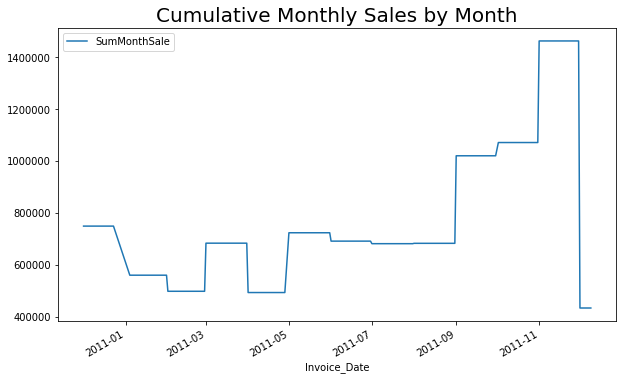

In [34]:
df.plot(x='Invoice_Date', y='SumMonthSale' ,kind='line', figsize=(10,6))
plt.title('Cumulative Monthly Sales by Month',fontsize=20)

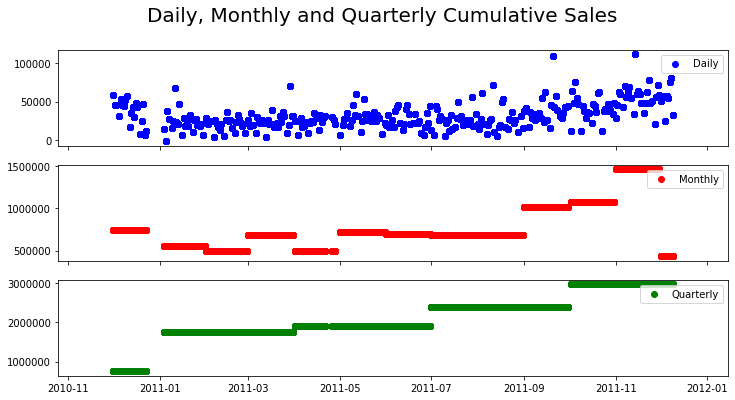

In [35]:
f, axes=plt.subplots(nrows=3, ncols=1, figsize=(12,6), sharex=True)

f.suptitle('Daily, Monthly and Quarterly Cumulative Sales', fontsize=20)
labels= ['Daily', 'Monthly', 'Quarterly']
colors=['b', 'r','g']
axes[0].scatter(df.Invoice_Date, df.SumDaySale,color='b', label='Daily')
axes[0].legend(loc='upper right')
axes[1].scatter(df.Invoice_Date, df.SumMonthSale, color='r', label='Monthly')
axes[1].legend(loc='upper right')
axes[2].scatter(df.Invoice_Date, df.SumQSale, color='g', label='Quarterly')
axes[2].legend(loc='upper right')

plt.show()

In [36]:
dfQ=df.groupby(by='Invoice_Q')['SumQSale'].mean()
y_pos = np.arange(dfQ.shape[0])

In [37]:
dfM=df.groupby(by='Invoice_M')['SumMonthSale'].mean()
y_posM = np.arange(dfM.shape[0])
y_posMb=df['Invoice_M'].unique()

In [38]:
y_posMb

<PeriodArray>
['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
 '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']
Length: 13, dtype: period[M]

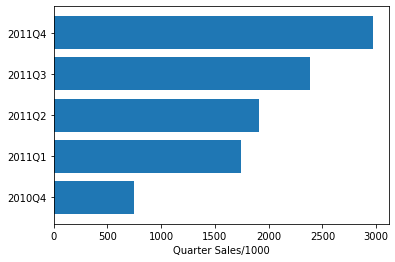

In [39]:
fig, ax=plt.subplots()
ax.barh(y_pos, dfQ/1000)
ax.set_yticks(y_pos)
ax.set_yticklabels(['2010Q4', '2011Q1', '2011Q2', '2011Q3', '2011Q4'])
ax.set_xlabel('Quarter Sales/1000')
plt.show()

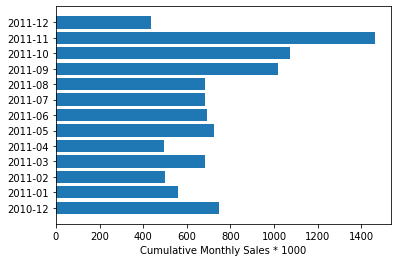

In [40]:
fig, ax=plt.subplots()
ax.barh(y_posM, dfM/1000)
ax.set_yticks(y_posM)
ax.set_yticklabels(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
 '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12'])
ax.set_xlabel('Cumulative Monthly Sales * 1000')
plt.show()

In [41]:
df.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'Sales', 'SumDaySale', 'Invoice_Q', 'SumQSale', 'Invoice_M',
       'SumMonthSale', 'ClientDayCumSales', 'ClientMonthCumSales',
       'ClientQCumSales', 'ClientDaySalesPC', 'ClientMonthSalesPC',
       'ClientQSalesPC'],
      dtype='object')

## Monthly Growth

In [42]:
MG=df.groupby('Invoice_M')['SumMonthSale'].mean()

In [43]:
MG

Invoice_M
2010-12    7.489570e+05
2011-01    5.600003e+05
2011-02    4.980626e+05
2011-03    6.832671e+05
2011-04    4.932071e+05
2011-05    7.233335e+05
2011-06    6.911231e+05
2011-07    6.813001e+05
2011-08    6.826805e+05
2011-09    1.019688e+06
2011-10    1.070705e+06
2011-11    1.461756e+06
2011-12    4.336680e+05
Freq: M, Name: SumMonthSale, dtype: float64

In [44]:
MG_pct=MG.pct_change()

In [45]:
MG_pct.rename('MGpct', inplace=True)

Invoice_M
2010-12         NaN
2011-01   -0.252293
2011-02   -0.110603
2011-03    0.371850
2011-04   -0.278163
2011-05    0.466592
2011-06   -0.044530
2011-07   -0.014213
2011-08    0.002026
2011-09    0.493653
2011-10    0.050032
2011-11    0.365228
2011-12   -0.703324
Freq: M, Name: MGpct, dtype: float64

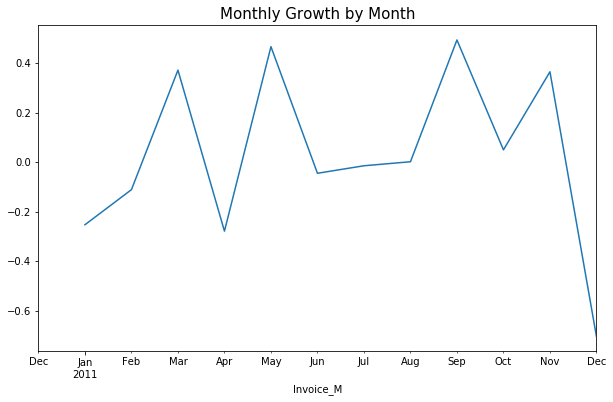

In [46]:
MG_pct.plot(figsize=(10,6))
plt.title('Monthly Growth by Month', fontsize=15);

In [47]:
df=df.merge(MG_pct, left_on='Invoice_M', right_index=True)

In [48]:
Months=df.Invoice_M.unique()

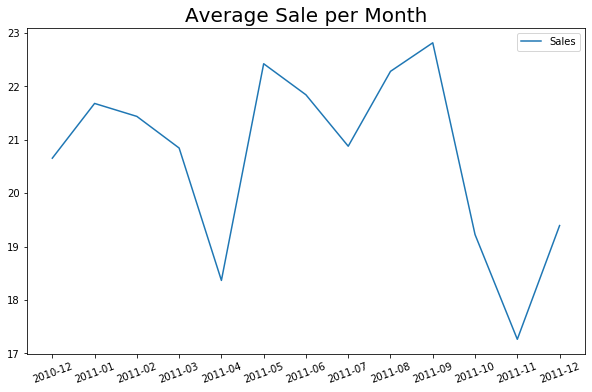

In [49]:
#Average sale per month
df.groupby('Invoice_M')['Sales'].mean().reset_index().plot(figsize=(10,6))
plt.title('Average Sale per Month', fontsize=20)
plt.xticks(range(0,13), Months,  rotation=20);



## Look at Clients

In [50]:
ClientTotSale=df.groupby(by='CustomerID')['Sales'].sum()

In [51]:
ClientTotSale.rename('ClientTotSales', inplace=True)

CustomerID
12346.0       0.00
12347.0    4310.00
12348.0    1797.24
12349.0    1757.55
12350.0     334.40
            ...   
18280.0     180.60
18281.0      80.82
18282.0     176.60
18283.0    2094.88
18287.0    1837.28
Name: ClientTotSales, Length: 4372, dtype: float64

In [52]:
df=df.merge(ClientTotSale, left_on='CustomerID', right_index=True)

In [53]:
df.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'Sales', 'SumDaySale', 'Invoice_Q', 'SumQSale', 'Invoice_M',
       'SumMonthSale', 'ClientDayCumSales', 'ClientMonthCumSales',
       'ClientQCumSales', 'ClientDaySalesPC', 'ClientMonthSalesPC',
       'ClientQSalesPC', 'MGpct', 'ClientTotSales'],
      dtype='object')

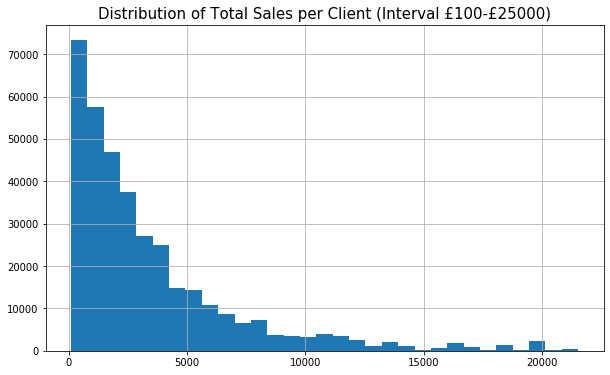

In [54]:
df[(df['ClientTotSales'] > 100) & (df['ClientTotSales'] < 25000)]['ClientTotSales'].hist(bins=31, figsize=(10,6))
plt.title('Distribution of Total Sales per Client (Interval £100-£25000)', fontsize=15);

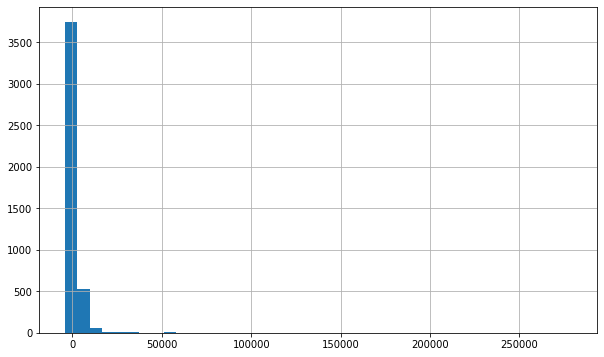

In [55]:
df.groupby('CustomerID')['Sales'].sum().hist(bins=41, figsize=(10,6))

In [56]:
returns=df[df['Sales']<0][['Quantity', 'CustomerID']].sort_values(by='Quantity')

In [57]:
returns['MultiReturns']=returns.duplicated()

In [58]:
returns['MultiReturns'].replace([False, True], [0,1],inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024BB228C148>]],
      dtype=object)

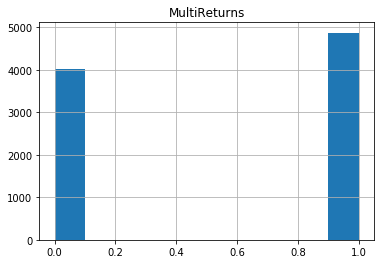

In [59]:
returns.hist(column='MultiReturns')

In [60]:
returns.sort_values('CustomerID')

,Quantity,CustomerID,MultiReturns
61624,-74215,12346.0,0
129737,-12,12352.0,1
129738,-12,12352.0,1
129741,-12,12352.0,1
129743,-12,12352.0,0
...,...,...,...
488517,-4,18274.0,1
481908,-1,18276.0,1
481921,-1,18276.0,0
70604,-1,18277.0,0


In [61]:
returns[returns['CustomerID']==15518.0][['CustomerID', 'MultiReturns']]

,CustomerID,MultiReturns
52774,15518.0,0
293404,15518.0,0
293097,15518.0,1
250163,15518.0,1
52708,15518.0,1
250162,15518.0,1


In [62]:
has_returned=returns.groupby(by='CustomerID')['MultiReturns'].sum()

In [63]:
df=df.merge(has_returned, on ='CustomerID')

In [64]:
df.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'Sales', 'SumDaySale', 'Invoice_Q', 'SumQSale', 'Invoice_M',
       'SumMonthSale', 'ClientDayCumSales', 'ClientMonthCumSales',
       'ClientQCumSales', 'ClientDaySalesPC', 'ClientMonthSalesPC',
       'ClientQSalesPC', 'MGpct', 'ClientTotSales', 'MultiReturns'],
      dtype='object')

In [65]:
Customer_FirstPurch=df.groupby('CustomerID')['Invoice_M'].min().reset_index()

In [66]:
Customer_FirstPurch=Customer_FirstPurch.rename(columns={'Invoice_M': 'First_InvoiceM'})

In [67]:
Customer_FirstPurch

,CustomerID,First_InvoiceM
0,12346.0,2011-01
1,12352.0,2011-02
2,12359.0,2011-01
3,12362.0,2011-02
4,12365.0,2011-02
...,...,...
1584,18272.0,2011-04
1585,18274.0,2011-11
1586,18276.0,2011-10
1587,18277.0,2011-01


In [68]:
df=df.merge(Customer_FirstPurch, on ='CustomerID')

In [69]:
df.rename({'First_InvoiceM_x': 'First_InvoiceM'}, axis=1, inplace=True)

In [70]:
df['CustomerType'] = np.where(df['First_InvoiceM']< df['Invoice_M'], True, False)

In [71]:
df.CustomerType.replace([True, False], ['Existing', 'New'], inplace=True)

In [72]:
df.head()

,key_0,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,...,ClientMonthCumSales,ClientQCumSales,ClientDaySalesPC,ClientMonthSalesPC,ClientQSalesPC,MGpct,ClientTotSales,MultiReturns,First_InvoiceM,CustomerType
0,2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,...,5391.21,5391.21,2.557049,0.719829,0.719829,NaN,5288.63,11,2010-12,New
1,2010-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,...,5391.21,5391.21,2.557049,0.719829,0.719829,NaN,5288.63,11,2010-12,New
2,2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,...,5391.21,5391.21,2.557049,0.719829,0.719829,NaN,5288.63,11,2010-12,New
3,2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,...,5391.21,5391.21,2.557049,0.719829,0.719829,NaN,5288.63,11,2010-12,New
4,2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,...,5391.21,5391.21,2.557049,0.719829,0.719829,NaN,5288.63,11,2010-12,New


In [73]:
DF_CType=df.groupby(['Invoice_M', 'CustomerType'])['Sales'].sum().reset_index()

In [74]:
DF_CType.Invoice_M=DF_CType.Invoice_M.astype('string')

In [75]:
DF_CustType_Red=DF_CType[DF_CType['Invoice_M']>'2010-12']

In [76]:
DF_CustType_Red=DF_CustType_Red[DF_CustType_Red['Invoice_M']<'2011-12']

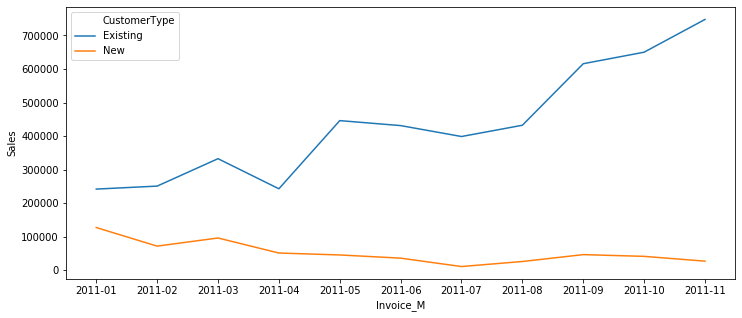

In [77]:
plt.figure(figsize=(12,5))
sns.lineplot(data=DF_CustType_Red, x="Invoice_M", y="Sales", hue="CustomerType")

In [78]:
df.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'Sales', 'SumDaySale', 'Invoice_Q', 'SumQSale', 'Invoice_M',
       'SumMonthSale', 'ClientDayCumSales', 'ClientMonthCumSales',
       'ClientQCumSales', 'ClientDaySalesPC', 'ClientMonthSalesPC',
       'ClientQSalesPC', 'MGpct', 'ClientTotSales', 'MultiReturns',
       'First_InvoiceM', 'CustomerType'],
      dtype='object')

In [79]:
df['ClientMonthCumSales'].mean()

2287.9733696295903

In [80]:
df['ActiveMonth'] = np.where(df['ClientMonthCumSales'] > 0, 1,0)

In [81]:
MActive=df.loc[df['ActiveMonth']== 1][['Invoice_M','CustomerID', 'ClientMonthCumSales' ]]

In [82]:
active_monthly=MActive.groupby('Invoice_M')['CustomerID'].nunique()
active_monthly.rename('ActiveCustomer_M', inplace=True)

Invoice_M
2010-12    475
2011-01    440
2011-02    438
2011-03    524
2011-04    479
2011-05    615
2011-06    569
2011-07    515
2011-08    525
2011-09    654
2011-10    655
2011-11    798
2011-12    344
Freq: M, Name: ActiveCustomer_M, dtype: int64

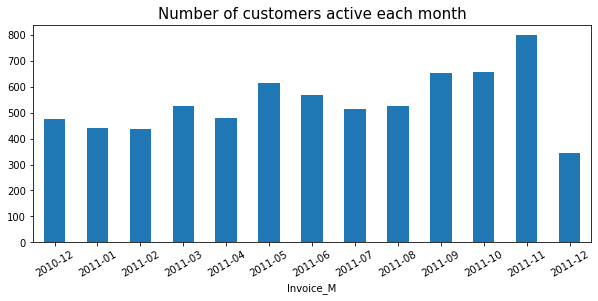

In [83]:
active_monthly.plot(x='Invoice_M',  y='ActiveCustomer_M', kind='bar', rot=30, figsize=(10,4))
plt.title('Number of customers active each month', fontsize=15);

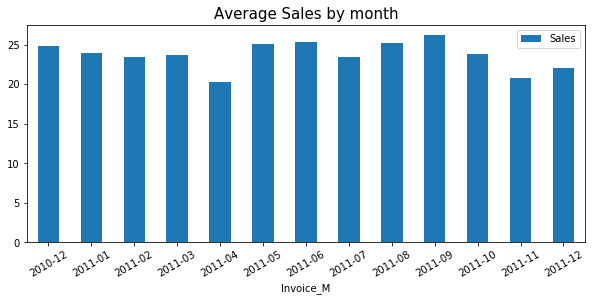

In [84]:
df.groupby('Invoice_M')[['Sales']].mean().plot(kind='bar', figsize=(10,4), rot=30)
plt.title('Average Sales by month', fontsize=15);

## Retention Rate

In [85]:
dfRet=df.groupby(['CustomerID', 'Invoice_M'])['Sales'].sum().reset_index()

In [86]:
dfRet

,CustomerID,Invoice_M,Sales
0,12346.0,2011-01,0.00
1,12352.0,2011-02,296.50
2,12352.0,2011-03,304.68
3,12352.0,2011-09,632.50
4,12352.0,2011-11,311.73
...,...,...,...
7715,18276.0,2011-11,-12.50
7716,18277.0,2011-01,-12.75
7717,18277.0,2011-10,110.38
7718,18282.0,2011-08,98.76


In [87]:
months=df.Invoice_M.drop_duplicates().reset_index()

In [88]:
months=months.sort_values(by='Invoice_M').reset_index()

In [89]:
months_c=months.Invoice_M

In [90]:
months

,level_0,index,Invoice_M
0,0,0,2010-12
1,2,329,2011-01
2,1,297,2011-02
3,3,356,2011-03
4,12,820,2011-04
5,4,379,2011-05
6,5,398,2011-06
7,6,432,2011-07
8,7,443,2011-08
9,10,655,2011-09


In [91]:
retained_customers=[]
tot_customers=[]
for i in range(len(months_c)-1):
    month=months_c[i+1]
    prev_month=months_c[i]
    clients=df[df['Invoice_M']==months_c[i+1]]['CustomerID'].unique()
    clients_prev=df[df['Invoice_M']==months_c[i]]['CustomerID'].unique()
    ret_clients=len([client for client in clients if client in clients_prev ])
    retained_customers.append(ret_clients)
    tot_customers.append(len(clients))

In [92]:
retained_customers

[283, 243, 275, 282, 304, 363, 319, 319, 331, 390, 466, 324]

In [93]:
tot_customers

[487, 483, 576, 528, 642, 634, 566, 575, 694, 724, 850, 419]

In [94]:
len(df[df['Invoice_M']=='2011-12']['CustomerID'].unique())

419

In [95]:
Retention=[]
for item1, item2 in zip(retained_customers, tot_customers):
    RR= (item1/item2)
    Retention.append(RR)

In [96]:
Retention=Retention[0:11]

In [97]:
Retention

[0.5811088295687885,
 0.5031055900621118,
 0.4774305555555556,
 0.5340909090909091,
 0.4735202492211838,
 0.5725552050473186,
 0.5636042402826855,
 0.5547826086956522,
 0.4769452449567723,
 0.5386740331491713,
 0.548235294117647]

In [98]:
months_c.drop(labels=[0,12], inplace=True)

In [99]:
RR=pd.DataFrame({'Invoice_M': months_c,
              'RetentionRate': Retention})

In [100]:
RR

,Invoice_M,RetentionRate
1,2011-01,0.581109
2,2011-02,0.503106
3,2011-03,0.477431
4,2011-04,0.534091
5,2011-05,0.473520
6,2011-06,0.572555
7,2011-07,0.563604
8,2011-08,0.554783
9,2011-09,0.476945
10,2011-10,0.538674


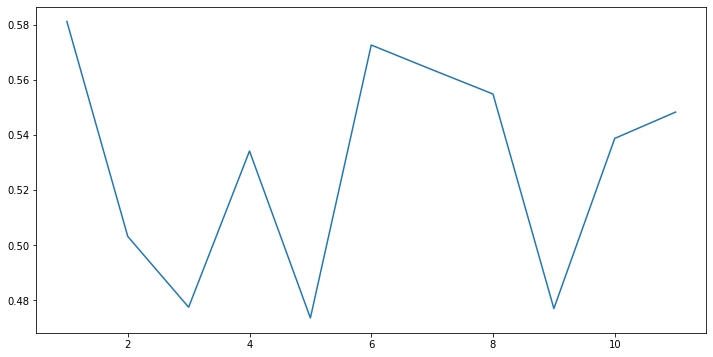

In [101]:
RR.RetentionRate.plot(figsize=(12,6))

In [102]:
##Retention table: which customers are active every month
pd.crosstab(df.CustomerID, df.Invoice_M).reset_index()

Invoice_M,CustomerID,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,12346.0,0,2,0,0,0,0,0,0,0,0,0,0,0
1,12352.0,0,0,15,33,0,0,0,0,0,32,0,15,0
2,12359.0,0,16,80,0,2,0,47,0,0,0,105,0,4
3,12362.0,0,0,29,0,29,0,0,19,33,40,75,19,30
4,12365.0,0,0,23,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1584,18272.0,0,0,0,0,55,4,0,37,22,0,29,0,23
1585,18274.0,0,0,0,0,0,0,0,0,0,0,0,22,0
1586,18276.0,0,0,0,0,0,0,0,0,0,0,14,2,0
1587,18277.0,0,1,0,0,0,0,0,0,0,0,8,0,0


## Recency - Frequency - Monetary Value (RFM)

### Recency: how many days the customers are inactive

In [103]:
RFM=df.groupby('CustomerID')['Invoice_Date'].max().reset_index()

In [104]:
RFM.rename({'Invoice_Date':'InvoiceDateMax'},axis=1, inplace=True)

In [105]:
RFM['Recency']=(RFM['InvoiceDateMax'].max()-RFM['InvoiceDateMax']).dt.days

In [106]:
RFM.sort_values(by='Recency')

,CustomerID,InvoiceDateMax,Recency
485,14051.0,2011-12-09,0
228,13069.0,2011-12-09,0
1361,17364.0,2011-12-09,0
1470,17754.0,2011-12-09,0
949,15694.0,2011-12-09,0
...,...,...,...
674,14679.0,2010-12-03,371
1406,17547.0,2010-12-02,372
1279,16995.0,2010-12-02,372
459,13958.0,2010-12-02,372


In [107]:
RFM.describe()

,CustomerID,Recency
count,1589.000000,1589.000000
mean,15183.020768,64.541221
std,1723.587032,87.432970
min,12346.000000,0.000000
25%,13709.000000,8.000000
50%,15135.000000,25.000000
75%,16660.000000,77.000000
max,18282.000000,372.000000


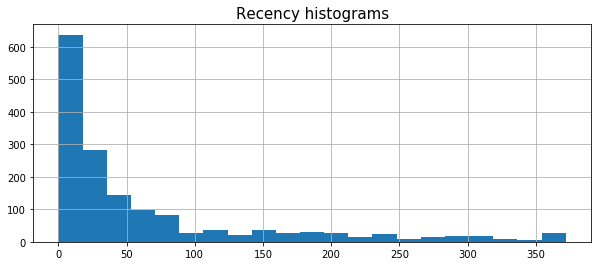

In [108]:
RFM.Recency.hist(bins=21, figsize=(10,4))
plt.title('Recency histograms', fontsize=15);

### Frequency

In [109]:
Freq=df.groupby('CustomerID')['Invoice_Date'].count().reset_index()
Freq.rename({'Invoice_Date': 'Frequency'}, inplace=True, axis=1)

In [110]:
Freq

,CustomerID,Frequency
0,12346.0,2
1,12352.0,95
2,12359.0,254
3,12362.0,274
4,12365.0,23
...,...,...
1584,18272.0,170
1585,18274.0,22
1586,18276.0,16
1587,18277.0,9


In [111]:
RFM

,CustomerID,InvoiceDateMax,Recency
0,12346.0,2011-01-18,325
1,12352.0,2011-11-03,36
2,12359.0,2011-12-02,7
3,12362.0,2011-12-06,3
4,12365.0,2011-02-21,291
...,...,...,...
1584,18272.0,2011-12-07,2
1585,18274.0,2011-11-22,17
1586,18276.0,2011-11-18,21
1587,18277.0,2011-10-12,58


In [112]:
RFM=RFM.merge(Freq, on='CustomerID')

In [113]:
RFM

,CustomerID,InvoiceDateMax,Recency,Frequency
0,12346.0,2011-01-18,325,2
1,12352.0,2011-11-03,36,95
2,12359.0,2011-12-02,7,254
3,12362.0,2011-12-06,3,274
4,12365.0,2011-02-21,291,23
...,...,...,...,...
1584,18272.0,2011-12-07,2,170
1585,18274.0,2011-11-22,17,22
1586,18276.0,2011-11-18,21,16
1587,18277.0,2011-10-12,58,9


In [114]:
MValue=df.groupby('CustomerID')['Sales'].sum().reset_index()
MValue.rename({'Sales': 'MValue'}, inplace=True, axis=1)

In [115]:
RFM=RFM.merge(MValue, on='CustomerID')

In [116]:
RFM.head()

,CustomerID,InvoiceDateMax,Recency,Frequency,MValue
0,12346.0,2011-01-18,325,2,0.00
1,12352.0,2011-11-03,36,95,1545.41
2,12359.0,2011-12-02,7,254,6245.53
3,12362.0,2011-12-06,3,274,5154.58
4,12365.0,2011-02-21,291,23,320.69


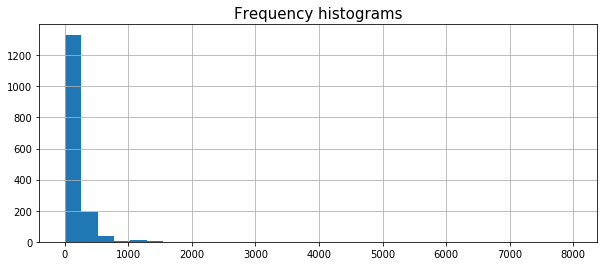

In [117]:
RFM.Frequency.hist(bins=31, figsize=(10,4))
plt.title('Frequency histograms', fontsize=15);

### Monetary Value corresponds to 'Sales' , already calculated

## Clustering

In [118]:
from sklearn.cluster import KMeans
recency=RFM
recency=recency.drop(['CustomerID', 'InvoiceDateMax', 'Frequency', 'MValue'], axis=1)

In [119]:
recency

,Recency
0,325
1,36
2,7
3,3
4,291
...,...
1584,2
1585,17
1586,21
1587,58


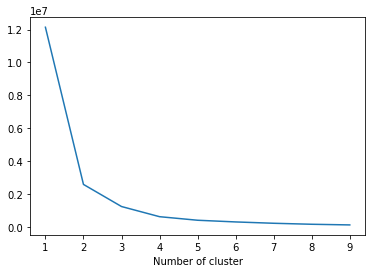

In [120]:
## Apply elbow method to determine the number of clusters
elbow={}
for i in range(1,10):
    km=KMeans(n_clusters=i, max_iter=500).fit(recency)
    recency['cluster'] = km.labels_
    elbow[i]= km.inertia_
    
plt.figure()
plt.plot(list(elbow.keys()), list(elbow.values()))
plt.xlabel("Number of cluster")
plt.show();

In [121]:
# create recency clusters
km=KMeans(n_clusters=4)
km.fit(RFM[['Recency']])
RFM['RecCluster'] =km.predict(RFM[['Recency']])

In [122]:
# create frequency clusters
km=KMeans(n_clusters=4)
km.fit(RFM[['Frequency']])
RFM['FreqCluster'] =km.predict(RFM[['Frequency']])

In [123]:
# create value clusters
km=KMeans(n_clusters=4)
km.fit(RFM[['MValue']])
RFM['MValCluster'] =km.predict(RFM[['MValue']])

In [124]:
RFM.groupby('MValCluster')['MValue'].describe()


,count,mean,std,min,25%,50%,75%,max
MValCluster,,,,,,,,
0,1556.0,2406.601094,2992.443680,-4287.63,605.3075,1417.265,3005.4675,21535.90
1,5.0,129057.952000,36658.292209,88125.38,113384.1400,123725.450,132572.6200,187482.17
2,2.0,267963.755000,16299.186073,256438.49,262201.1225,267963.755,273726.3875,279489.02
3,26.0,41478.871538,13270.137224,25748.35,29379.2800,35078.555,52519.0600,65892.08


In [125]:
#Function to re-order a column values based on ascending or descending order
def reorder(data, v1, v2, keys=['asc', 'des']):
    mydict=dict()
    if keys== 'asc':
        s1=data.groupby(v1)[v2].mean().sort_values().reset_index()
    if keys == 'des':
        s1=data.groupby(v1)[v2].mean().sort_values(ascending=False).reset_index()
    mydict[s1[v1][0]]=0
    mydict[s1[v1][1]]=1
    mydict[s1[v1][2]]=2
    mydict[s1[v1][3]]=3
    
    data[v1].replace(mydict, inplace=True)


In [126]:
reorder(RFM, 'MValCluster','MValue', 'asc')

In [127]:
RFM.groupby('MValCluster')['MValue'].describe()


,count,mean,std,min,25%,50%,75%,max
MValCluster,,,,,,,,
0,1556.0,2406.601094,2992.443680,-4287.63,605.3075,1417.265,3005.4675,21535.90
1,26.0,41478.871538,13270.137224,25748.35,29379.2800,35078.555,52519.0600,65892.08
2,5.0,129057.952000,36658.292209,88125.38,113384.1400,123725.450,132572.6200,187482.17
3,2.0,267963.755000,16299.186073,256438.49,262201.1225,267963.755,273726.3875,279489.02


In [128]:
RFM.groupby('FreqCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FreqCluster,,,,,,,,
0,1299.0,77.115473,58.040371,1.0,28.00,65.0,116.0,230.0
1,4.0,5914.000000,1473.845537,4642.0,5006.50,5515.5,6423.0,7983.0
2,266.0,383.447368,132.269504,231.0,280.00,345.0,452.0,872.0
3,20.0,1398.300000,524.547434,925.0,1072.25,1162.5,1541.0,2782.0


In [129]:
reorder(RFM, 'FreqCluster','Frequency', 'asc')

In [130]:
RFM.groupby('FreqCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FreqCluster,,,,,,,,
0,1299.0,77.115473,58.040371,1.0,28.00,65.0,116.0,230.0
1,266.0,383.447368,132.269504,231.0,280.00,345.0,452.0,872.0
2,20.0,1398.300000,524.547434,925.0,1072.25,1162.5,1541.0,2782.0
3,4.0,5914.000000,1473.845537,4642.0,5006.50,5515.5,6423.0,7983.0


In [131]:
RFM.groupby('RecCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecCluster,,,,,,,,
0,102.0,316.862745,36.227564,252.0,290.25,312.0,357.0,372.0
1,973.0,14.019527,11.373053,0.0,4.00,10.0,22.0,42.0
2,334.0,70.823353,21.682294,43.0,53.00,65.0,84.0,126.0
3,180.0,183.000000,34.102376,127.0,153.50,182.0,211.0,249.0


In [132]:
reorder(RFM, 'RecCluster','Recency', 'des')

In [133]:
RFM.groupby('RecCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecCluster,,,,,,,,
0,102.0,316.862745,36.227564,252.0,290.25,312.0,357.0,372.0
1,180.0,183.000000,34.102376,127.0,153.50,182.0,211.0,249.0
2,334.0,70.823353,21.682294,43.0,53.00,65.0,84.0,126.0
3,973.0,14.019527,11.373053,0.0,4.00,10.0,22.0,42.0


In [134]:
RFM['TotalScore']=RFM.RecCluster  + RFM.FreqCluster + RFM.MValCluster

In [135]:
RFM.groupby('TotalScore')[['Recency', 'Frequency', 'MValue']].mean()

,Recency,Frequency,MValue
TotalScore,,,
0,317.009901,28.198020,429.330396
1,184.044944,41.539326,932.029556
2,71.919753,72.009259,1375.928673
3,16.259943,100.953125,2206.956365
4,11.248980,373.714286,7146.642163
5,9.434783,901.739130,23533.343478
6,6.333333,1363.000000,84473.293333
7,2.666667,3447.000000,97413.633333
8,1.000000,3994.000000,206030.820000


In [136]:
RFM['ClientValue']=RFM.TotalScore

In [137]:
RFM.ClientValue.replace({8:'High', 7:'High',6:'High',
                         5:'Medium', 4:'Medium',3:'Medium',
                         2:'Low', 1:'Low', 0:'Low'},inplace=True)

In [138]:
RFM.head()

,CustomerID,InvoiceDateMax,Recency,Frequency,MValue,RecCluster,FreqCluster,MValCluster,TotalScore,ClientValue
0,12346.0,2011-01-18,325,2,0.00,0,0,0,0,Low
1,12352.0,2011-11-03,36,95,1545.41,3,0,0,3,Medium
2,12359.0,2011-12-02,7,254,6245.53,3,1,0,4,Medium
3,12362.0,2011-12-06,3,274,5154.58,3,1,0,4,Medium
4,12365.0,2011-02-21,291,23,320.69,0,0,0,0,Low


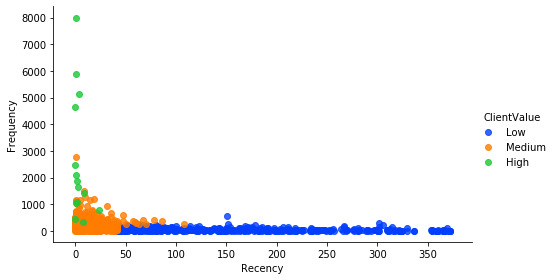

In [139]:
import seaborn as sns
sns.lmplot('Recency', 'Frequency', data=RFM, hue='ClientValue', height=4, aspect=1.7,palette='bright',fit_reg=False)

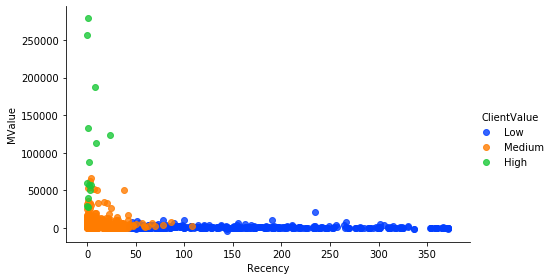

In [140]:
sns.lmplot('Recency', 'MValue', data=RFM, hue='ClientValue',height=4, aspect=1.7, palette='bright',fit_reg=False)

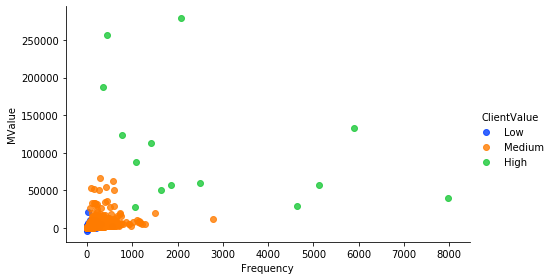

In [141]:
sns.lmplot('Frequency', 'MValue', data=RFM, hue='ClientValue', height=4, aspect=1.7,palette='bright',fit_reg=False)

In [142]:
RFM.groupby(['TotalScore']).agg({ 'Frequency': ('mean', 'count'),  
      'MValue': 'mean',
      'Recency': 'mean'})

Frequency               MValue     Recency
                   mean count           mean        mean
TotalScore                                              
0             28.198020   101     429.330396  317.009901
1             41.539326   178     932.029556  184.044944
2             72.009259   324    1375.928673   71.919753
3            100.953125   704    2206.956365   16.259943
4            373.714286   245    7146.642163   11.248980
5            901.739130    23   23533.343478    9.434783
6           1363.000000     6   84473.293333    6.333333
7           3447.000000     6   97413.633333    2.666667
8           3994.000000     2  206030.820000    1.000000

### Customer Lifetime Value

#### CLV=Total Gross Revenue-Total Cost. We dont have total cost so we can take MValue as CLV

In [143]:
print(df.Invoice_Date.min()," ", df.Invoice_Date.max())

2010-12-01 00:00:00   2011-12-09 00:00:00


In [144]:
#df2=pd.read_csv(r'C:\Users\escag\ESProjects\OnlineRetail\OnlineRetail.csv', encoding='latin1')
df2=df
df2.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Invoice_Time',
       'Sales', 'SumDaySale', 'Invoice_Q', 'SumQSale', 'Invoice_M',
       'SumMonthSale', 'ClientDayCumSales', 'ClientMonthCumSales',
       'ClientQCumSales', 'ClientDaySalesPC', 'ClientMonthSalesPC',
       'ClientQSalesPC', 'MGpct', 'ClientTotSales', 'MultiReturns',
       'First_InvoiceM', 'CustomerType', 'ActiveMonth'],
      dtype='object')

In [145]:
df2=df2.drop(['Invoice_Time', 'Invoice_Q', 'SumQSale', 'ClientQCumSales','ClientQSalesPC', 'MGpct', 'ClientTotSales', 'MultiReturns',
       'First_InvoiceM','CustomerType', 'ActiveMonth', 'ClientDaySalesPC', 'ClientMonthSalesPC', 'SumDaySale','ClientDayCumSales','SumMonthSale', 'ClientMonthCumSales' ], axis=1)

In [146]:
df2.columns

Index(['key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Sales',
       'Invoice_M'],
      dtype='object')

In [147]:
#Split data set into Training and test data sets. We take 3 months for the training set
df2_X=df2[(df2.Invoice_Date < "2011-05-01") & (df2.Invoice_Date >= "2011-02-01")].reset_index()
df2_y=df2[(df2.Invoice_Date >= "2011-05-01")& (df2.Invoice_Date < "2011-12-01") ].reset_index()

In [148]:
df2_X['Invoice_Date'].describe()

count                   46327
unique                     72
top       2011-04-18 00:00:00
freq                     1229
first     2011-02-01 00:00:00
last      2011-04-28 00:00:00
Name: Invoice_Date, dtype: object

#### Recalculate the training set's RFM

In [149]:
df2_X.columns

Index(['index', 'key_0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Date', 'Sales',
       'Invoice_M'],
      dtype='object')

In [150]:
# Recency
rfm_x=df2_X.groupby('CustomerID')['Invoice_Date'].max().reset_index()

In [151]:
rfm_x.rename({'Invoice_Date':'InvoiceDateMax'},axis=1, inplace=True)

In [152]:
rfm_x.head()

,CustomerID,InvoiceDateMax
0,12352.0,2011-03-22
1,12359.0,2011-04-13
2,12362.0,2011-04-28
3,12365.0,2011-02-21
4,12383.0,2011-04-15


In [153]:
rfm_x['Recency']=(rfm_x['InvoiceDateMax'].max()-rfm_x['InvoiceDateMax']).dt.days

In [154]:
rfm_x.head()

,CustomerID,InvoiceDateMax,Recency
0,12352.0,2011-03-22,37
1,12359.0,2011-04-13,15
2,12362.0,2011-04-28,0
3,12365.0,2011-02-21,66
4,12383.0,2011-04-15,13


In [155]:
## Frequency

In [156]:
Freq_x=df2_X.groupby('CustomerID')['Invoice_Date'].count().reset_index()
Freq_x.rename({'Invoice_Date': 'Frequency'}, inplace=True, axis=1)

In [157]:
Freq_x.head().sort_values(by='CustomerID')

,CustomerID,Frequency
0,12352.0,48
1,12359.0,82
2,12362.0,58
3,12365.0,23
4,12383.0,26


In [158]:
rfm_x=rfm_x.merge(Freq_x, on='CustomerID')

In [159]:
rfm_x

,CustomerID,InvoiceDateMax,Recency,Frequency
0,12352.0,2011-03-22,37,48
1,12359.0,2011-04-13,15,82
2,12362.0,2011-04-28,0,58
3,12365.0,2011-02-21,66,23
4,12383.0,2011-04-15,13,26
...,...,...,...,...
951,18257.0,2011-03-07,52,18
952,18260.0,2011-04-13,15,54
953,18263.0,2011-04-01,27,15
954,18270.0,2011-04-13,15,7


In [160]:
## Revenue 

In [161]:
MValue_x=df2_X.groupby('CustomerID')['Sales'].sum().reset_index()
MValue_x.rename({'Sales': 'MValue'}, inplace=True, axis=1)

In [162]:
rfm_x=rfm_x.merge(MValue_x, on='CustomerID')

In [163]:
rfm_x

,CustomerID,InvoiceDateMax,Recency,Frequency,MValue
0,12352.0,2011-03-22,37,48,601.18
1,12359.0,2011-04-13,15,82,1803.11
2,12362.0,2011-04-28,0,58,969.44
3,12365.0,2011-02-21,66,23,320.69
4,12383.0,2011-04-15,13,26,499.23
...,...,...,...,...,...
951,18257.0,2011-03-07,52,18,340.15
952,18260.0,2011-04-13,15,54,1000.33
953,18263.0,2011-04-01,27,15,307.60
954,18270.0,2011-04-13,15,7,67.75


In [164]:
# create recency clusters
km=KMeans(n_clusters=4)
km.fit(rfm_x[['Recency']])
rfm_x['RecCluster'] =km.predict(rfm_x[['Recency']])

In [165]:
# create frequency clusters
km=KMeans(n_clusters=4)
km.fit(rfm_x[['Frequency']])
rfm_x['FreqCluster'] =km.predict(rfm_x[['Frequency']])

In [166]:
# create value clusters
km=KMeans(n_clusters=4)
km.fit(rfm_x[['MValue']])
rfm_x['MValCluster'] =km.predict(rfm_x[['MValue']])

In [167]:
rfm_x.groupby('MValCluster')['MValue'].describe()


,count,mean,std,min,25%,50%,75%,max
MValCluster,,,,,,,,
0,876.0,612.275595,497.197157,-1591.20,272.800,472.66,856.8325,2164.85
1,2.0,38848.740000,11798.331203,30506.06,34677.400,38848.74,43020.0800,47191.42
2,11.0,15928.558182,2439.720482,11612.65,14501.440,15927.72,18161.9700,18887.64
3,67.0,3799.933433,1688.225039,2261.48,2607.545,3195.62,4312.9650,9221.06


In [168]:
reorder(rfm_x, 'MValCluster','MValue', 'asc')

In [169]:
rfm_x.groupby('MValCluster')['MValue'].describe()


,count,mean,std,min,25%,50%,75%,max
MValCluster,,,,,,,,
0,876.0,612.275595,497.197157,-1591.20,272.800,472.66,856.8325,2164.85
1,67.0,3799.933433,1688.225039,2261.48,2607.545,3195.62,4312.9650,9221.06
2,11.0,15928.558182,2439.720482,11612.65,14501.440,15927.72,18161.9700,18887.64
3,2.0,38848.740000,11798.331203,30506.06,34677.400,38848.74,43020.0800,47191.42


In [170]:
rfm_x.groupby('FreqCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FreqCluster,,,,,,,,
0,4.0,750.000000,134.367655,601.0,694.00,736.0,792.0,927.0
1,785.0,27.554140,17.642711,1.0,13.00,25.0,41.0,68.0
2,153.0,109.431373,34.917339,69.0,85.00,99.0,121.0,229.0
3,14.0,353.857143,81.366084,240.0,290.25,337.5,418.5,496.0


In [171]:
reorder(rfm_x, 'FreqCluster','Frequency', 'asc')

In [172]:
rfm_x.groupby('FreqCluster')['Frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FreqCluster,,,,,,,,
0,785.0,27.554140,17.642711,1.0,13.00,25.0,41.0,68.0
1,153.0,109.431373,34.917339,69.0,85.00,99.0,121.0,229.0
2,14.0,353.857143,81.366084,240.0,290.25,337.5,418.5,496.0
3,4.0,750.000000,134.367655,601.0,694.00,736.0,792.0,927.0


In [173]:
rfm_x.groupby('RecCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecCluster,,,,,,,,
0,408.0,8.323529,5.623593,0.0,2.0,9.0,14.00,18.0
1,164.0,50.731707,6.259322,41.0,44.0,51.0,57.00,62.0
2,266.0,28.454887,5.927219,20.0,23.0,28.0,34.00,39.0
3,118.0,73.805085,6.835376,63.0,69.0,73.0,77.75,86.0


In [174]:
reorder(rfm_x, 'RecCluster','Recency', 'des')

In [175]:
rfm_x.groupby('RecCluster')['Recency'].describe()

,count,mean,std,min,25%,50%,75%,max
RecCluster,,,,,,,,
0,118.0,73.805085,6.835376,63.0,69.0,73.0,77.75,86.0
1,164.0,50.731707,6.259322,41.0,44.0,51.0,57.00,62.0
2,266.0,28.454887,5.927219,20.0,23.0,28.0,34.00,39.0
3,408.0,8.323529,5.623593,0.0,2.0,9.0,14.00,18.0


In [176]:
rfm_x['TotalScore']=rfm_x.RecCluster  + rfm_x.FreqCluster + rfm_x.MValCluster

In [177]:
rfm_x.groupby('TotalScore')[['Recency', 'Frequency', 'MValue']].mean()

,Recency,Frequency,MValue
TotalScore,,,
0,73.869565,17.678261,268.095304
1,51.467532,26.577922,506.829026
2,29.950673,32.183857,580.778520
3,11.482866,40.470405,724.268692
4,9.463918,96.463918,2070.499907
5,7.548387,138.451613,4834.905161
6,7.166667,259.500000,10368.168333
7,2.000000,527.666667,14104.033333
8,0.333333,553.666667,25140.110000


In [178]:
rfm_x['ClientValue']=rfm_x.TotalScore

In [179]:
rfm_x.ClientValue.replace({ 8:'High', 7:'High', 6:'High',
                         5:'Medium', 4:'Medium', 3:'Low',
                         2:'Low', 1:'Low', 0:'Low'},inplace=True)

In [180]:
rfm_x.head()

,CustomerID,InvoiceDateMax,Recency,Frequency,MValue,RecCluster,FreqCluster,MValCluster,TotalScore,ClientValue
0,12352.0,2011-03-22,37,48,601.18,2,0,0,2,Low
1,12359.0,2011-04-13,15,82,1803.11,3,1,0,4,Medium
2,12362.0,2011-04-28,0,58,969.44,3,0,0,3,Low
3,12365.0,2011-02-21,66,23,320.69,0,0,0,0,Low
4,12383.0,2011-04-15,13,26,499.23,3,0,0,3,Low


In [181]:
df_yUser=df2_y.groupby('CustomerID')['Sales'].sum().reset_index()

In [182]:
df_yUser.columns=['CustomerID','y_Sales']

In [183]:
df_yUser.head()

,CustomerID,y_Sales
0,12352.0,944.23
1,12359.0,3986.17
2,12362.0,3656.10
3,12375.0,457.50
4,12379.0,850.29


In [184]:
df_ym=pd.merge(rfm_x,df_yUser, on='CustomerID', how='left')

In [185]:
df_ym.drop('InvoiceDateMax', axis=1, inplace=True)

In [186]:
df_ym.head()

,CustomerID,Recency,Frequency,MValue,RecCluster,FreqCluster,MValCluster,TotalScore,ClientValue,y_Sales
0,12352.0,37,48,601.18,2,0,0,2,Low,944.23
1,12359.0,15,82,1803.11,3,1,0,4,Medium,3986.17
2,12362.0,0,58,969.44,3,0,0,3,Low,3656.10
3,12365.0,66,23,320.69,0,0,0,0,Low,NaN
4,12383.0,13,26,499.23,3,0,0,3,Low,99.45


In [187]:
df_ym.isnull().sum()

CustomerID      0
Recency         0
Frequency       0
MValue          0
RecCluster      0
FreqCluster     0
MValCluster     0
TotalScore      0
ClientValue     0
y_Sales        84
dtype: int64

In [188]:
df_ym=df_ym.fillna(0)
#df_ym

In [189]:
df_ym.groupby('ClientValue')['y_Sales'].mean()

ClientValue
High      49445.533333
Low        1655.182645
Medium     8953.937812
Name: y_Sales, dtype: float64

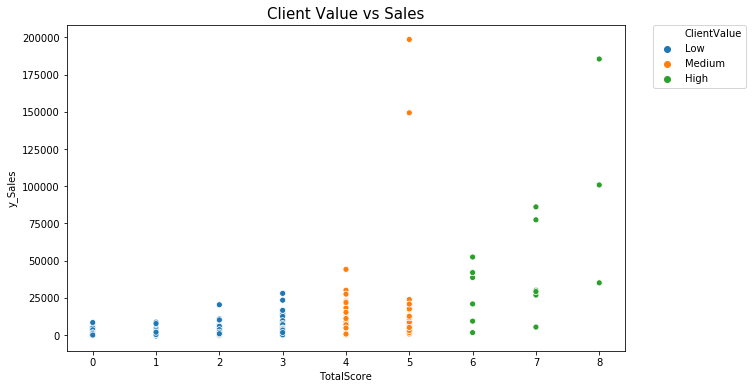

In [190]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_ym, x='TotalScore',y='y_Sales',hue="ClientValue")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Client Value vs Sales', fontsize=15);

In [191]:
# Remove outliers
df_ym=df_ym[df_ym['y_Sales'] < df_ym['y_Sales'].quantile(0.99)]

In [192]:
# Create CLV clusters
km=KMeans(n_clusters=3)
km.fit(df_ym[["y_Sales"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [193]:
df_ym=df_ym.assign(CLVScore=np.nan)

In [194]:
df_ym['CLVScore']=km.predict(df_ym[['y_Sales']])

In [195]:
df_ym.groupby('CLVScore')['y_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
CLVScore,,,,,,,,
0,795.0,1192.227937,991.867588,-609.40,364.8000,994.170,1841.775,3750.02
1,20.0,23430.484500,5385.592494,15296.20,19845.5025,22801.445,27637.185,35109.76
2,131.0,6426.288092,2511.452834,3816.59,4519.6350,5686.320,7413.910,14411.28


In [196]:
df_ym['CLVScore'].replace({1:2, 2:1, 0:0},  inplace=True)

In [197]:
df_ym.groupby('CLVScore')['y_Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
CLVScore,,,,,,,,
0,795.0,1192.227937,991.867588,-609.40,364.8000,994.170,1841.775,3750.02
1,131.0,6426.288092,2511.452834,3816.59,4519.6350,5686.320,7413.910,14411.28
2,20.0,23430.484500,5385.592494,15296.20,19845.5025,22801.445,27637.185,35109.76


In [198]:
df_ym.head()

,CustomerID,Recency,Frequency,MValue,RecCluster,FreqCluster,MValCluster,TotalScore,ClientValue,y_Sales,CLVScore
0,12352.0,37,48,601.18,2,0,0,2,Low,944.23,0
1,12359.0,15,82,1803.11,3,1,0,4,Medium,3986.17,1
2,12362.0,0,58,969.44,3,0,0,3,Low,3656.10,0
3,12365.0,66,23,320.69,0,0,0,0,Low,0.00,0
4,12383.0,13,26,499.23,3,0,0,3,Low,99.45,0


In [199]:
## Classification using XGB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
import category_encoders as ce
from category_encoders import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import RepeatedStratifiedKFold

In [200]:
mod1=xgb.XGBClassifier()
pipe=make_pipeline(OrdinalEncoder(), mod1)
X=df_ym.drop(['CLVScore', 'y_Sales'], axis=1)
y=df_ym["CLVScore"]

In [262]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.20, random_state=10)

In [263]:
pipe.steps[1][1].set_params(objective='multi:softprob', learning_rate=0.1, max_depth=3, n_estimators=100)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [264]:
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8736842105263158

In [265]:
feats = pd.DataFrame({ 'Importance': pipe.steps[1][1].feature_importances_, 'Column': X.columns})
feats.sort_values(by='Importance', ascending=False)

,Importance,Column
3,0.474509,MValue
7,0.147333,TotalScore
0,0.147073,CustomerID
2,0.129732,Frequency
1,0.101353,Recency
4,0.000000,RecCluster
5,0.000000,FreqCluster
6,0.000000,MValCluster
8,0.000000,ClientValue


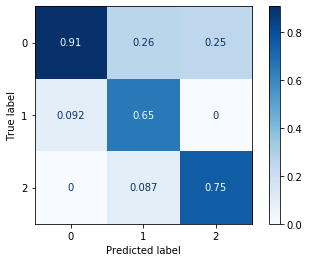

In [266]:
plot_confusion_matrix(pipe, X_test, y_test,cmap=plt.cm.Blues,normalize='pred');

In [267]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       155
           1       0.65      0.50      0.57        30
           2       0.75      0.60      0.67         5

    accuracy                           0.87       190
   macro avg       0.77      0.68      0.72       190
weighted avg       0.86      0.87      0.87       190



## **References**
### https://towardsdatascience.com/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444